In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [8]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [9]:
df.shape

(1025, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [19]:
df.corr()["target"]

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

ValueError: num must be an integer with 1 <= num <= 12, not 13

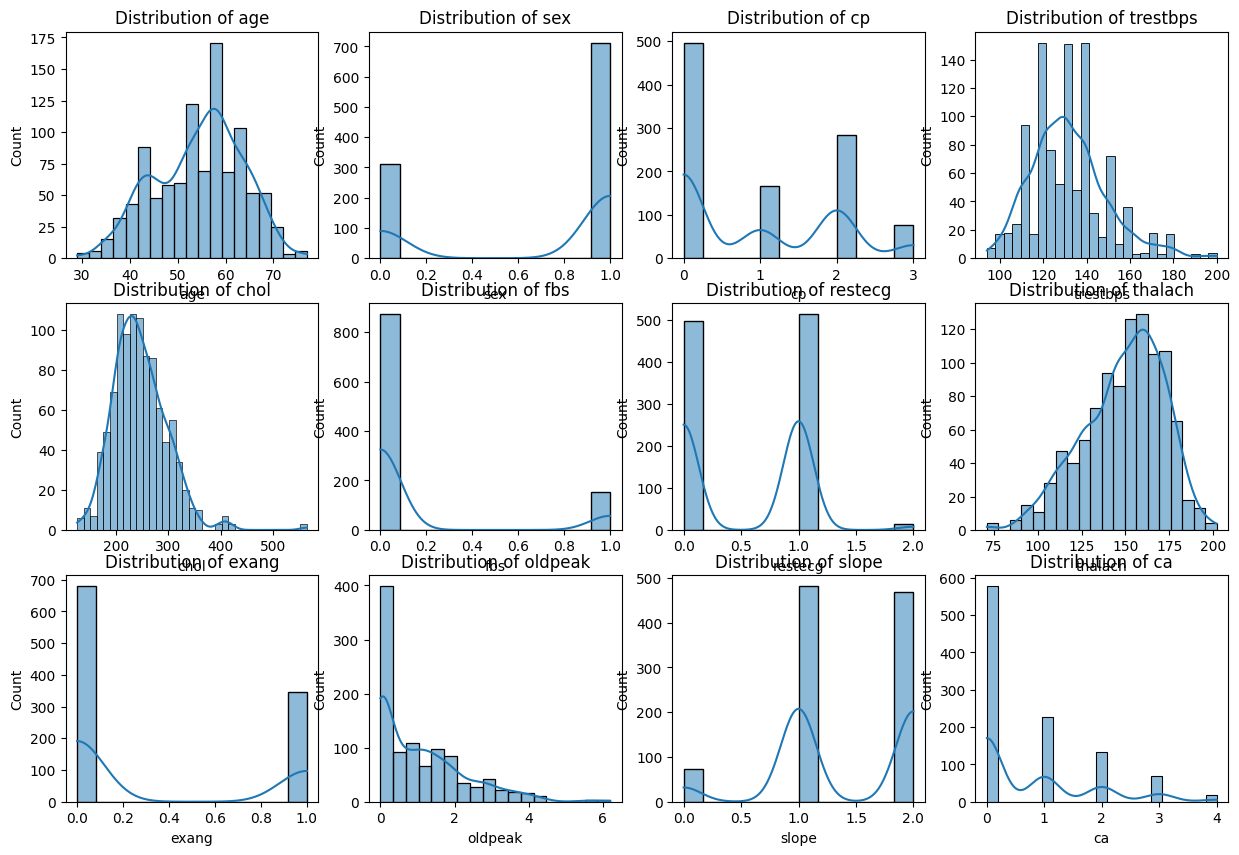

In [22]:
columns = df.columns

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

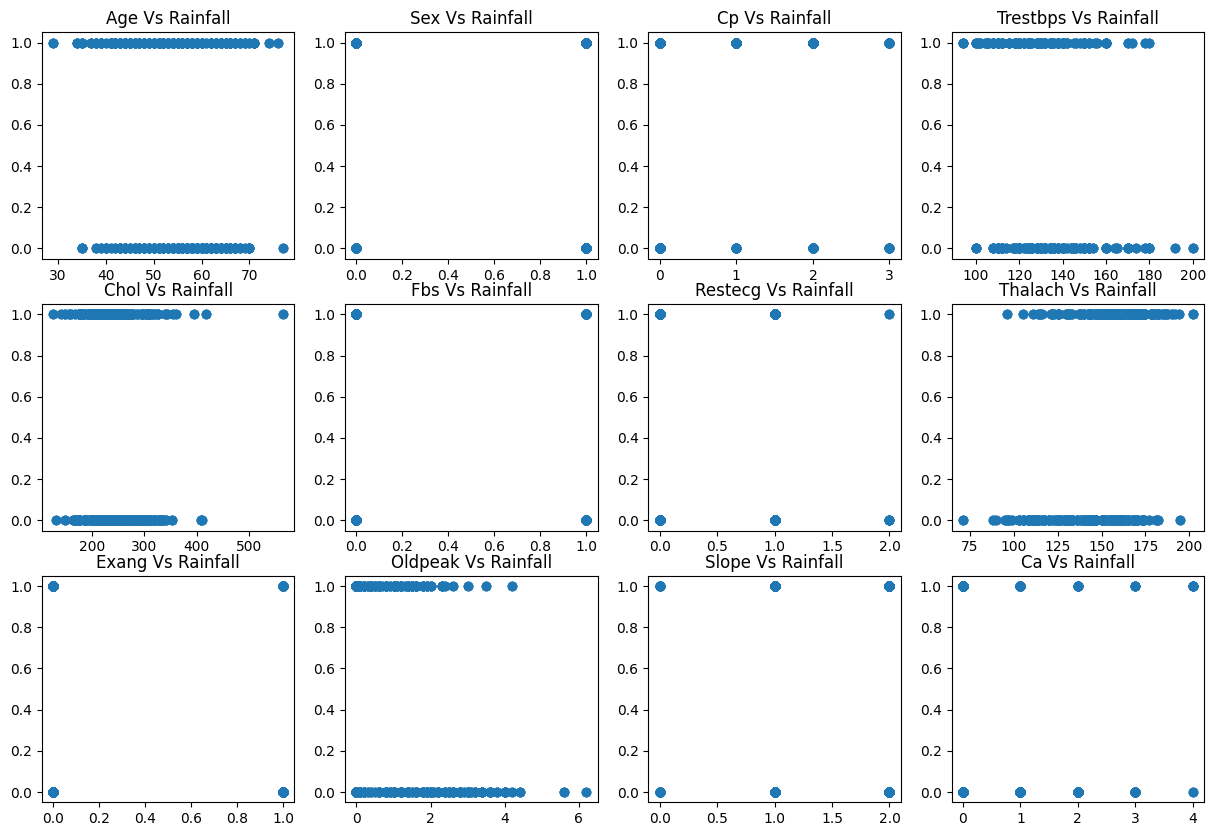

In [23]:
columns = df.columns.to_list()

columns.remove("target")

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    plt.scatter(x=df[column], y=df["target"])
    plt.title(f"{column.capitalize()} Vs Rainfall")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df.drop(["target","chol"] ,axis=1))
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.1, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]


for model in models:

    name = model.__class__.__name__

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Model: ", name)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("----------------------------------------------------")


Model:  LogisticRegression
Accuracy:  0.7961165048543689
Precision:  0.7142857142857143
Recall:  0.8888888888888888
F1 Score:  0.7920792079207921
Confusion Matrix:  [[42 16]
 [ 5 40]]
----------------------------------------------------
Model:  SVC
Accuracy:  0.912621359223301
Precision:  0.86
Recall:  0.9555555555555556
F1 Score:  0.9052631578947369
Confusion Matrix:  [[51  7]
 [ 2 43]]
----------------------------------------------------
Model:  DecisionTreeClassifier
Accuracy:  0.970873786407767
Precision:  1.0
Recall:  0.9333333333333333
F1 Score:  0.9655172413793104
Confusion Matrix:  [[58  0]
 [ 3 42]]
----------------------------------------------------
Model:  RandomForestClassifier
Accuracy:  0.970873786407767
Precision:  1.0
Recall:  0.9333333333333333
F1 Score:  0.9655172413793104
Confusion Matrix:  [[58  0]
 [ 3 42]]
----------------------------------------------------
Model:  KNeighborsClassifier
Accuracy:  0.912621359223301
Precision:  0.9090909090909091
Recall:  0.888888